# Assignment Part-I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso , Ridge
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# reading the dataset
data = pd.read_csv(r"C:\Users\Arpita.Datta\Downloads\Assignment_24th Jan'24/train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.shape

(1460, 81)

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Null values Calculation
def MissingValuesColumns():
    totalcolumn = data.isnull().sum().sort_values(ascending=False)
    percent = round(data.isnull().sum()*100/len(data), 2).sort_values(ascending=False)
    
    Table_Details = pd.concat([totalcolumn, percent], axis=1, keys=['Count', 'Percent'])
    Table_Details = Table_Details[Table_Details.Count != 0]
    
    if len(Table_Details) == 0:
        return 'Missing Values Column'
    return Table_Details

In [7]:
# Columns with null values
MissingValuesColumns()

,Count,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [8]:
# Removeing column'PoolQC','MiscFeature','Alley','Fence' as they have more than 80% missing values
df= data.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1)

In [9]:
#filling the missing values by mean for int type 

data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())


In [10]:
#fill in missing values by mode for str type 

data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['GarageType'] = data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mode())
data['GarageFinish'] = data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual'] = data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond'] = data['GarageCond'].fillna(data['GarageCond'].mode()[0])
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mode()[0])  

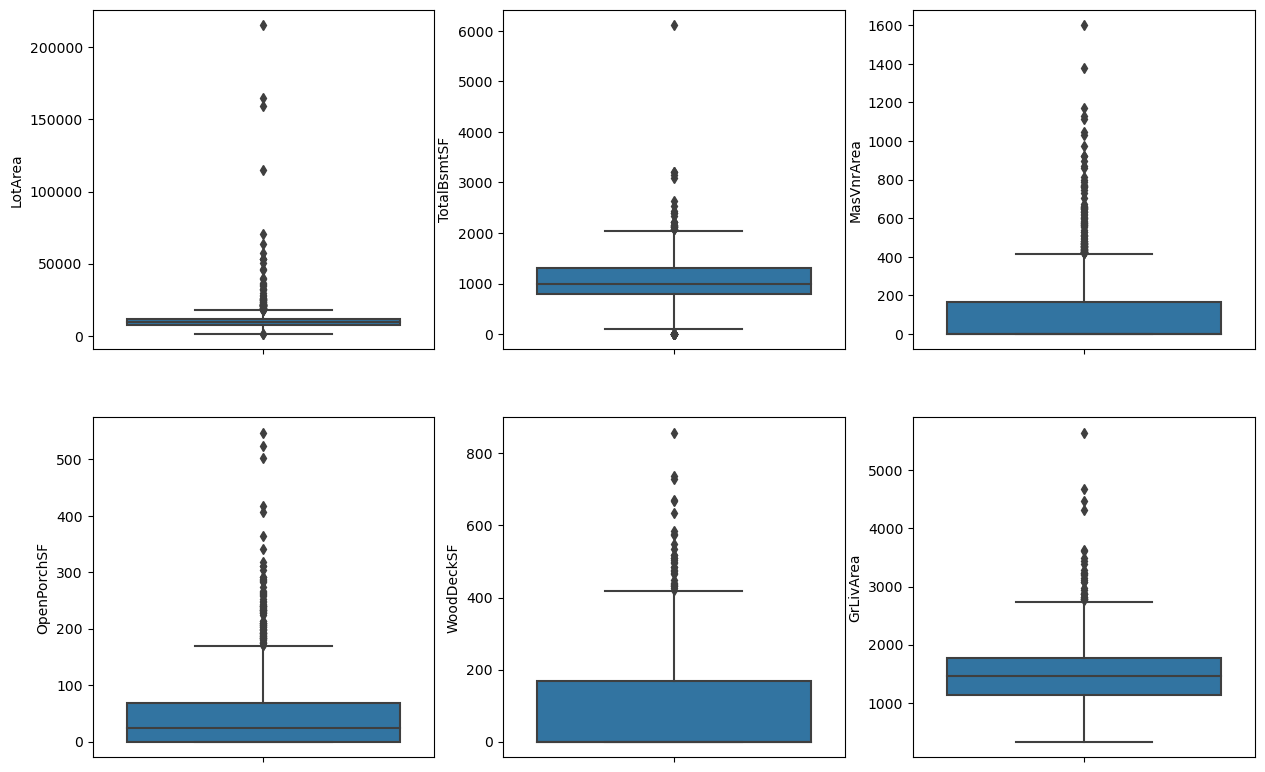

In [11]:
# Check the outliers in all the numeric columns (boxplot)

plt.figure(figsize=(15, 15))
plt.subplot(3,3,1)
sns.boxplot(y = 'LotArea',  data = df)
plt.subplot(3,3,2)
sns.boxplot(y = 'TotalBsmtSF', data = df)
plt.subplot(3,3,3)
sns.boxplot(y = 'MasVnrArea', data = df)
plt.subplot(3,3,4)
sns.boxplot(y = 'OpenPorchSF', data = df)
plt.subplot(3,3,5)
sns.boxplot(y = 'WoodDeckSF', data = df)
plt.subplot(3,3,6)
sns.boxplot(y = 'GrLivArea', data = df)


plt.show()

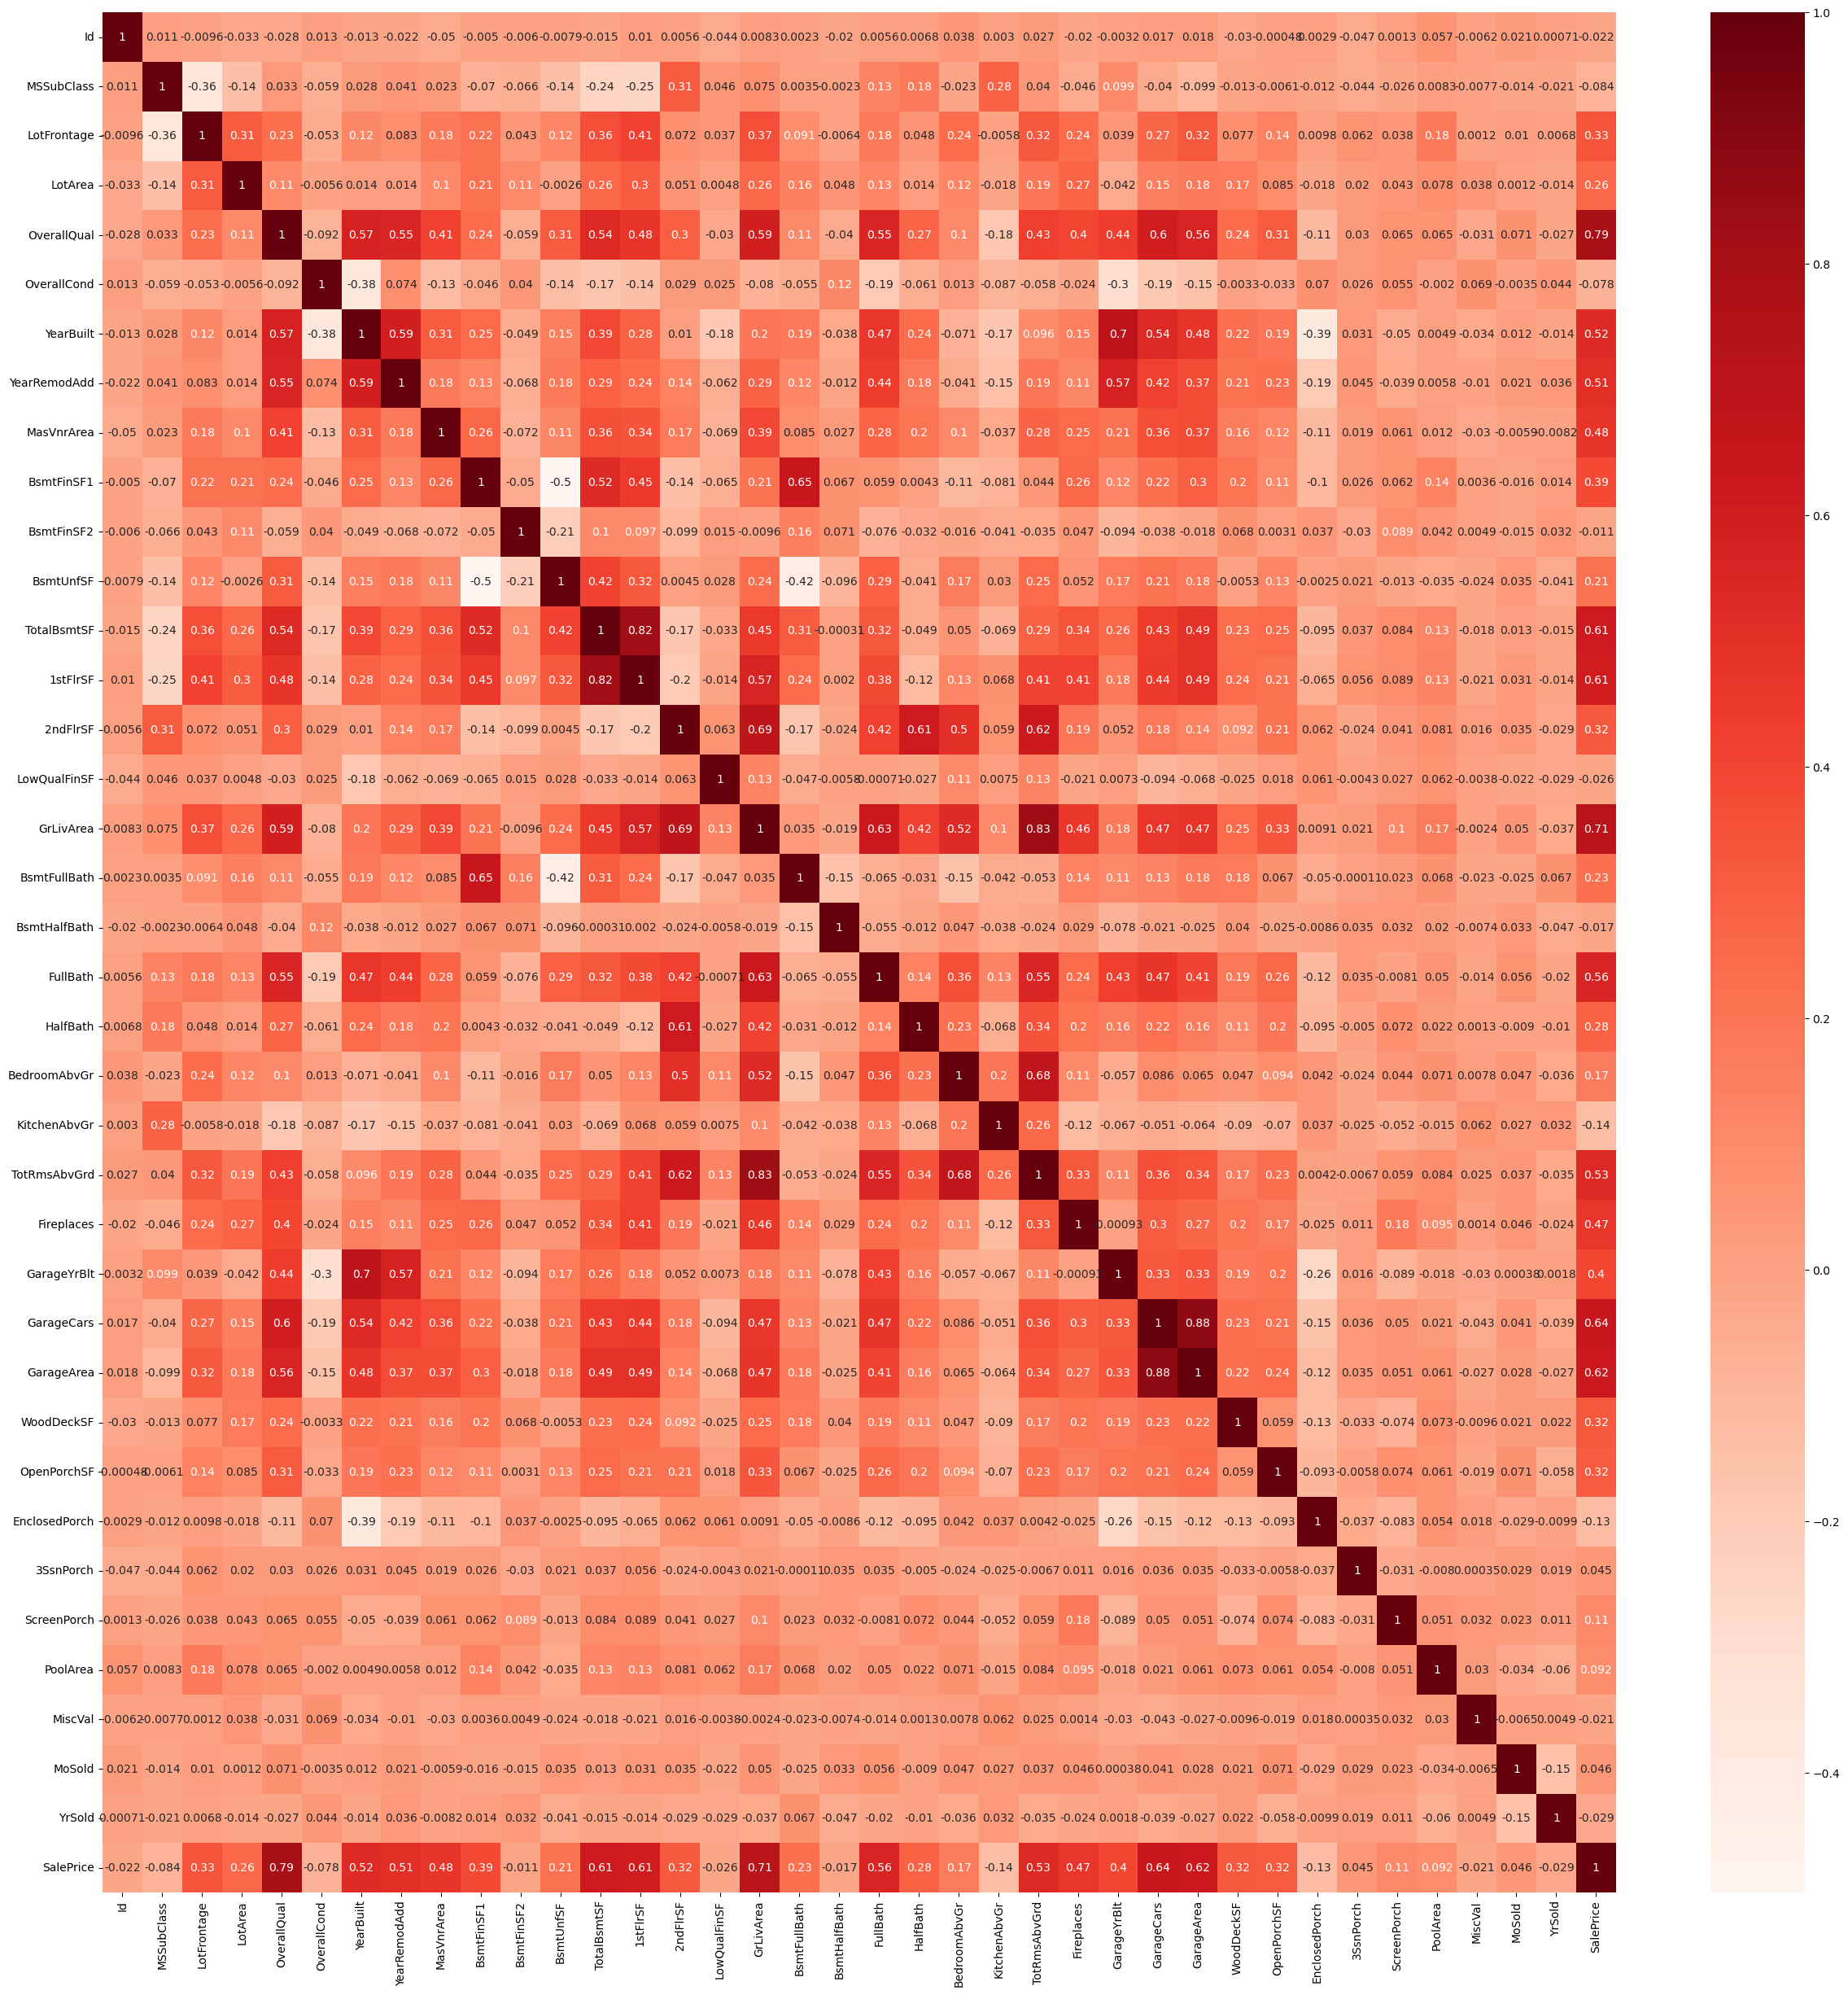

In [12]:
#plotting the heatmap for correlation

plt.figure(figsize=(30,30))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
#Correlations with the output variable which are important atleast 40% correlated with target variable sales 

threshold = 0.4
cor_criterion = abs(cor["SalePrice"])

relevant_features = cor_criterion[cor_criterion>threshold]
relevant_features = relevant_features.reset_index()
relevant_features.columns = ['Variables', 'Correlation']
relevant_features = relevant_features.sort_values(by='Correlation', ascending=False)
relevant_features

,Variables,Correlation
12,SalePrice,1.000000
0,OverallQual,0.790982
6,GrLivArea,0.708624
10,GarageCars,0.640409
11,GarageArea,0.623431
4,TotalBsmtSF,0.613581
5,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
1,YearBuilt,0.522897


In [14]:
#One model assumption of linear regression analysis is to avoid multicollinearity
threshold = 0.8

def high_cor_function(df):
    cor = df.corr()
    corrm = np.corrcoef(df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]    
    thresh = threshold 
    display(high_cor[high_cor>thresh])

In [15]:
num_col = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(data.select_dtypes(include=num_col).columns)
data = data[numerical_columns]

In [16]:
high_cor_function(data)

max corr: 0.8824754142814633 , min corr:  -0.4952514692570122


GarageArea    GarageCars     0.882475
TotRmsAbvGrd  GrLivArea      0.825489
1stFlrSF      TotalBsmtSF    0.819530
dtype: float64

In [17]:
#removing highly corrilated variables 
data.drop(['GarageCars','GrLivArea','TotalBsmtSF'] , axis=1 , inplace=True)

In [18]:
##Removing the highly correlated predictors to reduce multicollinearity.

df= df.drop(['TotRmsAbvGrd', '2ndFlrSF', '1stFlrSF'], axis = 1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [19]:
data.shape

(1460, 35)

# Test & Train Split

In [20]:
x = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [21]:
#Builiding with important columns
x = data[['SalePrice', 'OverallQual', 'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd','YearBuilt', 'MasVnrArea', 'Fireplaces']]

In [22]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)

In [23]:
# Standardize the features (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(trainX)
X_test_scaled = scaler.transform(testX)

# Lasso Regression

In [24]:
# Creating a Lasso regression model
lasso = Lasso()

In [25]:
# Define a range of hyperparameters to search (alpha values)
param_grid = {'alpha': [-500, 0.001, 0.01, 0.1, 1, 2, 10, 20 , 30 , 40,50, 100, 200 , 1000 ,1600]}

In [26]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=2)
grid_search.fit(X_train_scaled, trainY)

GridSearchCV(cv=2, estimator=Lasso(),
             param_grid={'alpha': [-500, 0.001, 0.01, 0.1, 1, 2, 10, 20, 30, 40,
                                   50, 100, 200, 1000, 1600]},
             scoring='neg_mean_squared_error')

In [27]:
# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print(grid_search.best_params_['alpha'])
# Train the model with the best hyperparameters
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_scaled, trainY)

# Make predictions on the test set
y_pred = lasso_best.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(testY, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

0.001
Mean Squared Error on Test Set: 9.64089372878541e-07


# Ridge Regression

In [28]:
# Creating a Ridge regression model
ridge = Ridge()

In [29]:
param_grid = {'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [30]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=2)
grid_search.fit(X_train_scaled, trainY)

GridSearchCV(cv=2, estimator=Ridge(),
             param_grid={'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [31]:
# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print(best_alpha)

0


In [32]:
# Train the model with the best hyperparameters
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, trainY)

# Make predictions on the test set
y_pred = ridge_best.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(testY, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 2.896930034216762e-20


# Final Summery

Identified is there are any missing values. 
 1> If missing percentage is more then 80% removeed those columns
 2> If missing percentage is less then, replace using mean/ median/ mode. in my work I have used Mean for Interger, and Mode for     Str type

Visualized heat map to check multi collinarity

Checked for correlation of each independent variable with dependent variable

Removed multicollinear columns 

Build model with column which are highly correlated with taget column

Normalized the data

Split 70: 30 data for train and test

Build lasso and ridge regression model with parametring set of values using grid search 